In [1]:
import numpy as np 
import tensorflow as tf 
import keras
from keras import utils 
from keras import layers 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Reshape
import matplotlib.pyplot as plt 
import pandas as pd
# import pickle

from astroNN.datasets import galaxy10 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion 

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [2]:
images, labels = galaxy10.load_data() #loading images
labels = utils.to_categorical(labels, 10) #convering labels to categorical values 

/Users/nvvankad/.astroNN/datasets/Galaxy10.h5 was found!


In [3]:
image_count = len(list(images))
print(image_count)
print(images)
print(labels)
print(type(images))
print(type(labels))

21785
[[[[16 18 15]
   [18 20 15]
   [16 17 12]
   ...
   [ 6  6  4]
   [ 9  9  7]
   [ 6  6  4]]

  [[19 24 20]
   [23 25 20]
   [17 18 13]
   ...
   [ 8  5  3]
   [10  8  6]
   [ 6  6  4]]

  [[17 22 18]
   [21 24 19]
   [17 18 13]
   ...
   [ 8  4  3]
   [11  8  7]
   [ 7  6  4]]

  ...

  [[17 14  7]
   [18 17  9]
   [15 14  7]
   ...
   [ 2  4  0]
   [ 3  5  0]
   [ 5  7  2]]

  [[22 14 11]
   [19 14  8]
   [12  9  3]
   ...
   [ 4  7  0]
   [ 6  9  2]
   [ 7 10  3]]

  [[30 12 11]
   [31 14  8]
   [24  9  2]
   ...
   [ 8 11  3]
   [11 14  6]
   [12 15  7]]]


 [[[ 1  3  0]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 5  7  4]
   [ 3  5  2]
   [ 4  6  3]]

  [[ 1  2  0]
   [ 1  1  0]
   [ 0  0  0]
   ...
   [ 3  7  3]
   [ 2  6  2]
   [ 2  6  3]]

  [[ 3  3  1]
   [ 1  1  0]
   [ 0  0  0]
   ...
   [ 1  3  0]
   [ 2  4  1]
   [ 2  4  1]]

  ...

  [[ 5  7  4]
   [ 5  7  4]
   [ 3  5  2]
   ...
   [ 2  4  1]
   [ 1  3  1]
   [ 1  3  0]]

  [[ 4  6  3]
   [ 3  5  2]
   [ 2  4  1]
   ...

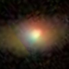

In [4]:
from PIL import Image
image2 = Image.fromarray(images[-1])
image2

In [5]:
print(image2.mode)
print(image2.size)

RGB
(69, 69)


In [6]:
from numpy import asarray

# convert image to numpy array
data = np.array(image2)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(69, 69, 3)


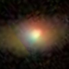

In [7]:
from PIL import Image

image3 = Image.fromarray(data)
image3

In [8]:
print(image3.mode)
print(image3.size)

RGB
(69, 69)


In [9]:
batch_size = 64
img_height = 69
img_width = 69
shuffle_buffer_size = 100

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((images[0:15428], labels[0:15428]))
train_ds = train_ds.shuffle(shuffle_buffer_size).batch(batch_size)
#train_images = images[:15428]
#train_labels = labels[:15428]
val_ds = tf.data.Dataset.from_tensor_slices((images[15429:17428], labels[15429:17428]))
val_ds = val_ds.shuffle(shuffle_buffer_size).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((images[17429:], labels[17429:]))
test_ds = test_ds.shuffle(shuffle_buffer_size).batch(batch_size)

In [11]:
input_shape = (69, 69, 3)
num_classes = 10

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape = input_shape))
model.add(layers.Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation = 'softmax'))


In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 69, 69, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 69, 69, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [13]:
epochs = 25
classifier = model.fit(
    train_ds, 
    #train_images, 
    #train_labels, 
    batch_size = batch_size,
    validation_data = val_ds, 
    epochs = epochs
)

Epoch 1/25
242/242 [==============================] - 30s 126ms/step - loss: 1.6559 - accuracy: 0.3417 - val_loss: 1.4014 - val_accuracy: 0.4372
Epoch 2/25
242/242 [==============================] - 29s 122ms/step - loss: 1.3808 - accuracy: 0.4320 - val_loss: 1.3049 - val_accuracy: 0.4887
Epoch 3/25
242/242 [==============================] - 31s 129ms/step - loss: 1.2520 - accuracy: 0.4922 - val_loss: 1.1252 - val_accuracy: 0.5518
Epoch 4/25
242/242 [==============================] - 33s 134ms/step - loss: 1.1644 - accuracy: 0.5372 - val_loss: 1.0497 - val_accuracy: 0.5968
Epoch 5/25
242/242 [==============================] - 40s 164ms/step - loss: 1.1081 - accuracy: 0.5709 - val_loss: 1.0022 - val_accuracy: 0.6333
Epoch 6/25
242/242 [==============================] - 30s 122ms/step - loss: 1.0553 - accuracy: 0.5978 - val_loss: 0.9673 - val_accuracy: 0.6553
Epoch 7/25
242/242 [==============================] - 33s 136ms/step - loss: 1.0037 - accuracy: 0.6190 - val_loss: 0.9140 - val_ac

In [14]:
local_path = '/Users/nvvankad/Documents/Personal/Masters/Github-Galaxification/Galaxification/'
model.save(local_path)
model = keras.models.load_model(local_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /Users/nvvankad/Documents/Personal/Masters/Github-Galaxification/Galaxification/assets


In [15]:
evaluation = model.evaluate(test_ds)

69/69 [==============================] - 2s 33ms/step - loss: 0.6722 - accuracy: 0.7626


Text(0.5, 1.0, 'Validation Accuracy')

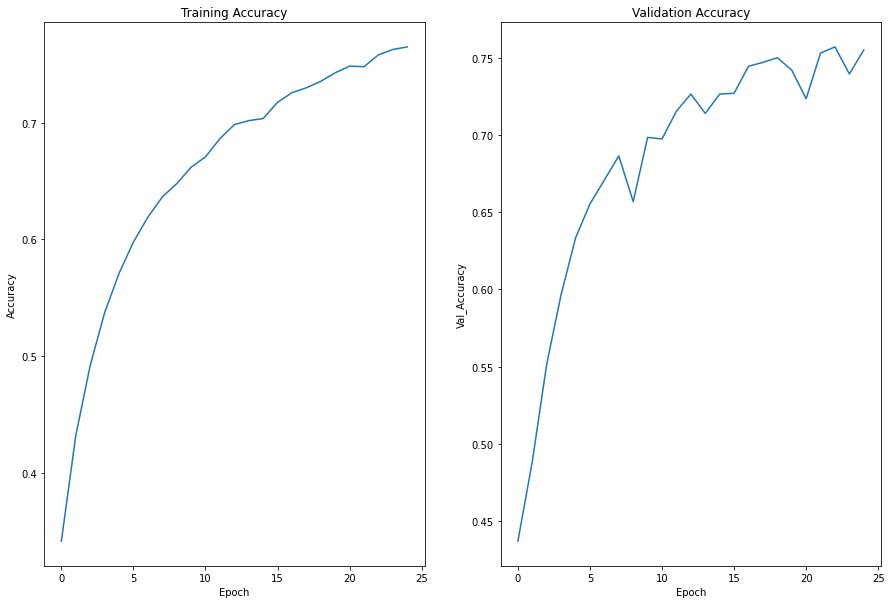

In [16]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(classifier.history["accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Training Accuracy")
ax = plt.subplot(1, 2, 2)
plt.plot(classifier.history["val_accuracy"])
plt.ylabel('Val_Accuracy')
plt.xlabel('Epoch')
plt.title("Validation Accuracy")

Text(0.5, 1.0, 'Validation Loss')

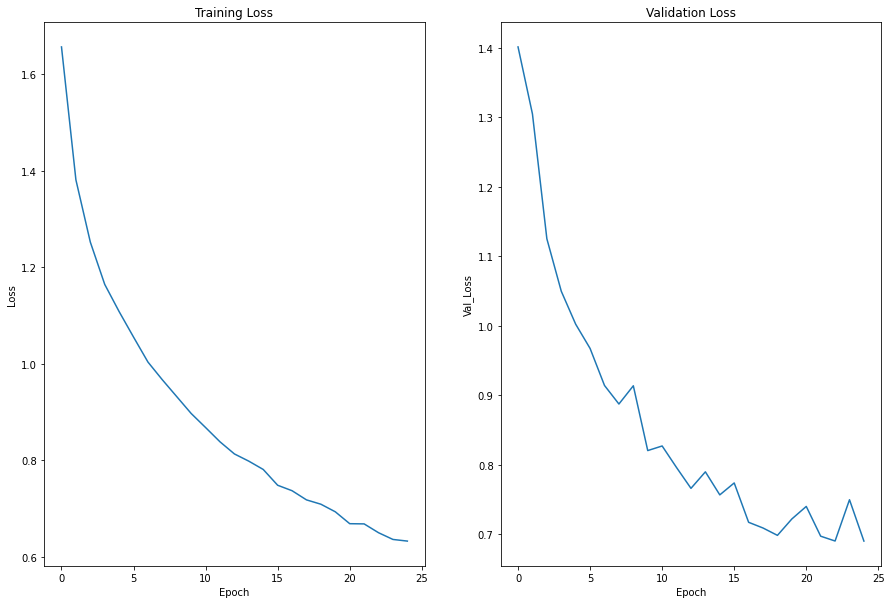

In [17]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(classifier.history["loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Training Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(classifier.history["val_loss"])
plt.ylabel('Val_Loss')
plt.xlabel('Epoch')
plt.title("Validation Loss")

In [18]:
check = model.predict(test_ds)
check = pd.DataFrame(check)
check.columns = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 
                 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
                 'Disk, Edge-on, No Bulge', 'Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

In [19]:
check 

,"Disk, Face-on, No Spiral","Smooth, Completely round","Smooth, in-between round","Smooth, Cigar shaped","Disk, Edge-on, Rounded Bulge","Disk, Edge-on, Boxy Bulge","Disk, Edge-on, No Bulge","Disk, Face-on, Tight Spiral","Disk, Face-on, Medium Spiral","Disk, Face-on, Loose Spiral"
0,0.074920,0.133840,0.790954,1.703087e-08,1.530999e-05,5.461678e-12,5.598874e-11,5.442812e-05,1.196625e-04,9.660592e-05
1,0.002120,0.901738,0.096142,3.553454e-10,6.319455e-09,2.683784e-16,8.943441e-14,4.290875e-07,1.864768e-07,1.898203e-07
2,0.001759,0.317907,0.680321,2.489034e-08,7.899465e-06,2.248732e-11,2.869062e-10,2.567488e-06,6.352501e-07,7.534578e-07
3,0.478249,0.001154,0.002316,1.138011e-07,8.823412e-08,5.833791e-11,2.773890e-08,5.805314e-02,4.097882e-01,5.044021e-02
4,0.196491,0.003872,0.000935,2.927170e-11,5.595160e-10,1.190102e-13,6.493688e-12,5.462489e-01,2.504210e-01,2.031843e-03
...,...,...,...,...,...,...,...,...,...,...
4351,0.383938,0.457081,0.158163,2.810125e-09,2.665693e-06,2.309524e-12,3.514413e-11,9.612312e-05,5.192706e-04,1.999034e-04
4352,0.111972,0.142750,0.743391,1.885070e-08,2.829329e-06,1.038278e-12,9.746236e-11,1.178247e-03,4.287394e-04,2.774251e-04
4353,0.214206,0.000007,0.241149,4.017046e-01,8.258326e-02,7.173413e-05,3.853044e-03,1.633541e-02,1.100415e-02,2.908505e-02
4354,0.157287,0.000036,0.823147,4.614718e-04,1.680096e-02,2.651289e-07,9.024442e-07,4.453499e-04,4.541501e-04,1.366859e-03


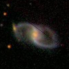

In [52]:
from numpy import asarray
# from PIL import Image

# convert image to numpy array
sample_image = Image.fromarray(images[17429 + 4289])
sample_image

In [50]:
img_array = keras.preprocessing.image.img_to_array(sample_image)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predicted_output = model.predict(img_array)

print(np.argmax(predicted_output, axis=1))

[8]


/Users/nvvankad/Documents/Personal/Masters/jupyterEnv/JupyterEnv/lib/python3.7/site-packages/astroNN/datasets/galaxy10.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


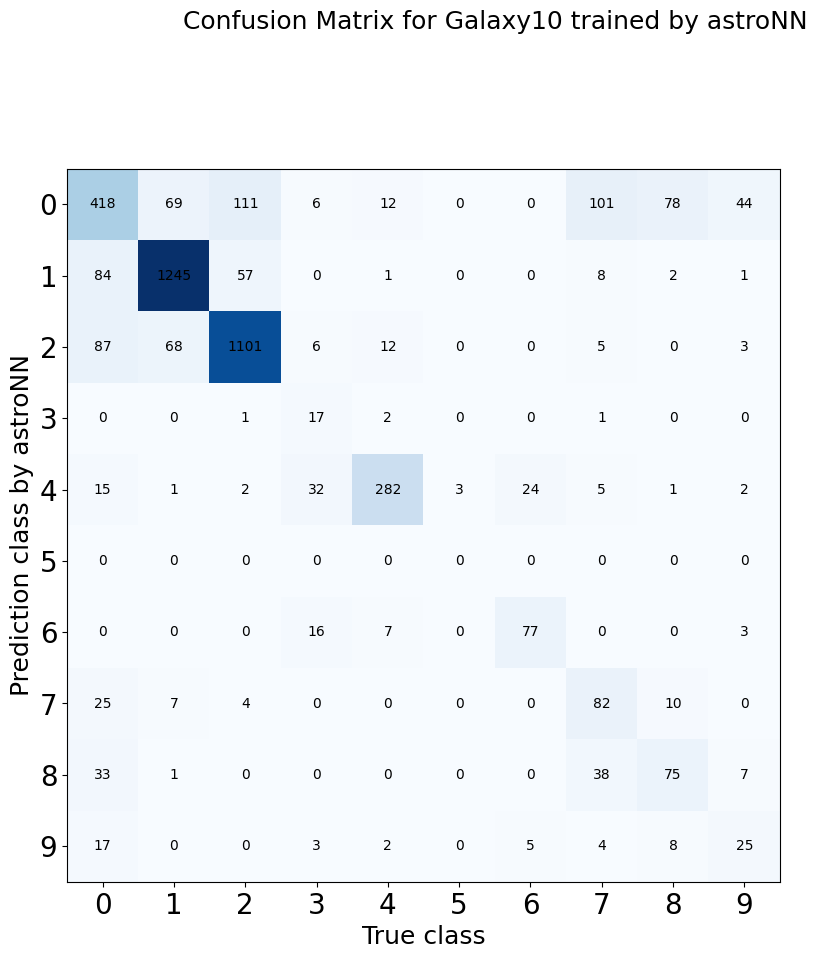

In [22]:
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = model.predict(images[17429:])

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(labels[17429:], axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)

In [51]:
# get sample images for different classificatin types
type(prediction_class)

#add - 17429. To get image from image dataset.
print(np.where(prediction_class == 9))

(array([ 124,  357,  435,  440,  451,  462,  554,  626,  785,  855,  901,
       1080, 1223, 1232, 1237, 1360, 1473, 1474, 1478, 1564, 1568, 1576,
       1660, 1673, 1701, 1717, 1720, 2063, 2079, 2112, 2424, 2476, 2500,
       2565, 2586, 2682, 2764, 2852, 2884, 2916, 2918, 2932, 2964, 3068,
       3077, 3222, 3234, 3260, 3285, 3333, 3390, 3422, 3467, 3492, 3763,
       4023, 4034, 4037, 4115, 4203, 4237, 4269, 4289, 4327]),)
